**Online payment fraud detection**

Online payment is the most popular transaction method in the world today. However, with an increase in online payments also comes a rise in payment fraud. The objective of this study is to identify fraudulent and non-fraudulent payments. The dataset is collected from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/project2/onlinefraud.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

EXPLORATORY DATA ANALYSIS

In [4]:
df.drop('isFlaggedFraud', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [6]:
#checking null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df["step"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [9]:
df["step"].nunique()

743

In [10]:
df['step'].value_counts()
#There are 743 steps, and every step has at least 2 occurrences.

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

Text(0, 0.5, 'Number of transactions')

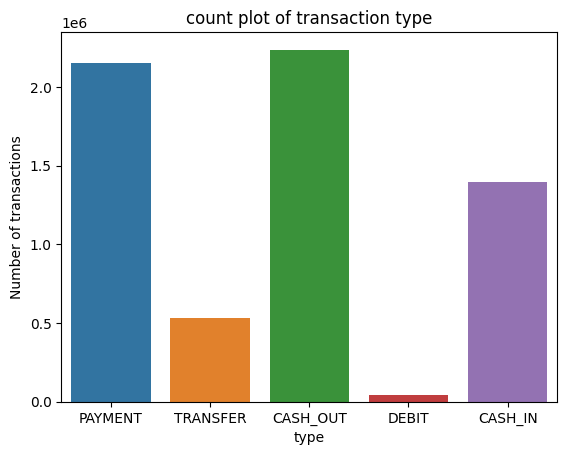

In [11]:
sns.countplot(x = 'type',data = df)
plt.title("count plot of transaction type")
plt.ylabel("Number of transactions")


In [12]:
#Cash out is the most numerous transaction type,
#followed by payment, cash in, transfer and debit types.#
#debit transaction type has the least

In [13]:
df['nameOrig'].value_counts()
#There are 6353307 initial customers, and every step has at least 1 occurrence.

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [14]:
df['nameDest'].value_counts()
#There are 2722362 recipients, and every step has at least 1 occurrence.

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

Text(0, 0.5, 'Number of transactions')

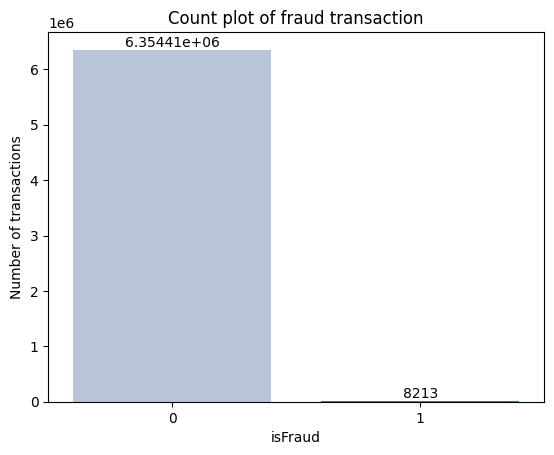

In [15]:
ax = sns.countplot(x='isFraud', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

#There are much more non-fraudulent transactions than fraudulent transactions.

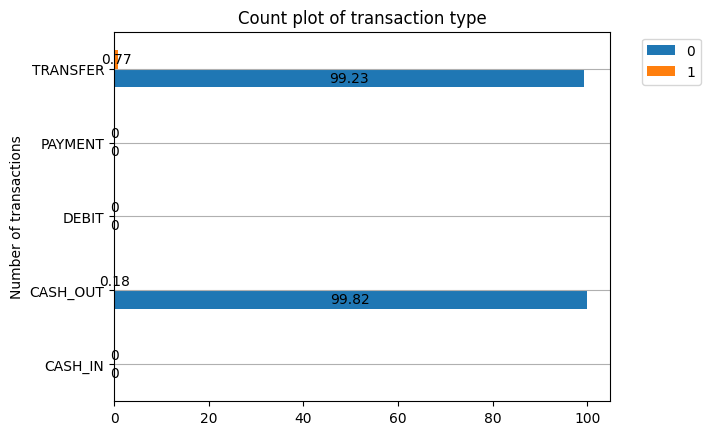

In [16]:
#checking fraud transactions based on the type of transaction
df2 = df.groupby(['type', 'isFraud']).size().unstack()
ax = df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh')

for container in ax.containers:
    ax.bar_label(container, label_type='center')
ax.set_title('Count plot of transaction type')
ax.legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax.set_ylabel('Number of transactions')
ax.grid(axis='y')
#Fraudulent transactions only occur in cash_out and transfer types.


<ipython-input-17-3384d090da97>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr('spearman')


Text(0.5, 1.0, 'Correlation')

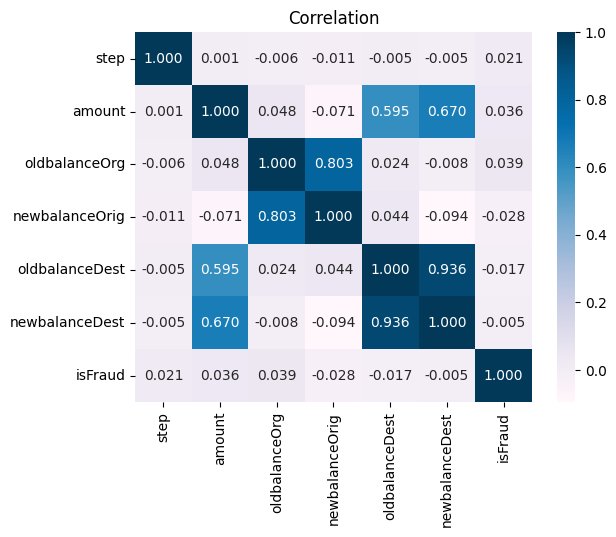

In [17]:
import numpy as np
corr_matrix = df.corr('spearman')
sns.heatmap(corr_matrix, cbar=True, annot=True, fmt='.3f', cmap='PuBu')
plt.title('Correlation')

In [18]:
#oldbalanceOrg and newbalanceOrig has strong positive relationship.
# oldbalanceDest and newbalanceDest has strong positive relationship.
# oldbalanceOrg and amount has weak positive relationship.
# newbalanceOrig and amount has moderate positive relationship.

MODEL BUILDING

In [19]:
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [20]:

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score


X = df.copy()
x = X.drop(['isFraud','type','nameOrig','nameDest'],axis = 1)
y = X['isFraud']


In [21]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 0)

In [23]:
y_train.shape

(5090096,)

In [24]:
x_train.shape

(5090096, 6)

In [25]:
x_test.shape

(1272524, 6)

In [26]:
y_test.shape

(1272524,)

**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.9996039367430398

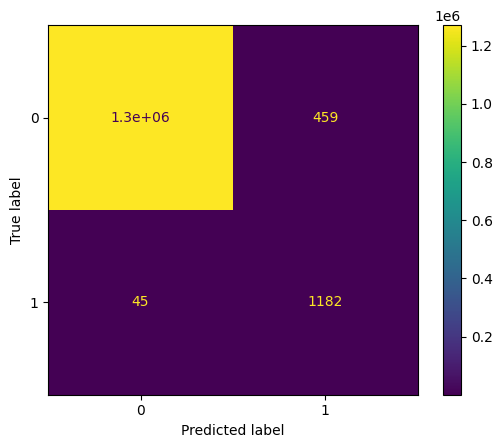

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
result = confusion_matrix(y_pred,y_test)
cmd = ConfusionMatrixDisplay(result,display_labels = [0,1])
cmd.plot()



In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00   1270883\n           1       0.96      0.72      0.82      1641\n\n    accuracy                           1.00   1272524\n   macro avg       0.98      0.86      0.91   1272524\nweighted avg       1.00      1.00      1.00   1272524\n'

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
accuracy_score(y_pred,y_test)

0.9991960858891463

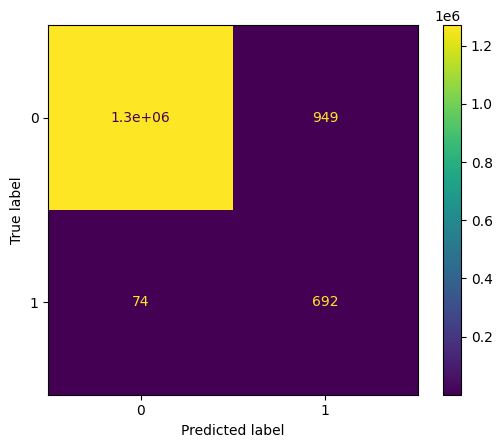

In [ ]:
result = confusion_matrix(y_pred,y_test)
cmd = ConfusionMatrixDisplay(result,display_labels = [0,1])
cmd.plot()


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.90      0.42      0.57      1641

    accuracy                           1.00   1272524
   macro avg       0.95      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train,y_train)
y_pred = KNC.predict(x_test)
accuracy_score(y_test,y_pred)

0.9994200502308798

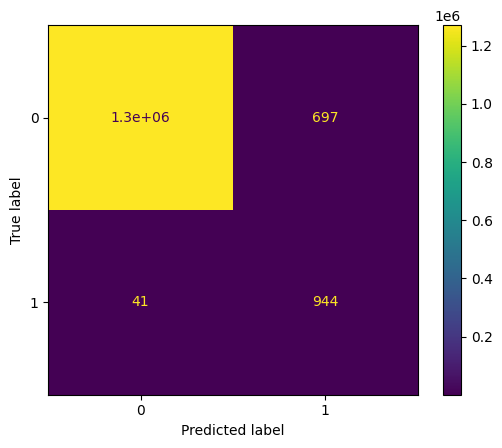

In [ ]:
result = confusion_matrix(y_pred,y_test)
cmd = ConfusionMatrixDisplay(result,display_labels = [0,1])
cmd.plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.96      0.58      0.72      1641

    accuracy                           1.00   1272524
   macro avg       0.98      0.79      0.86   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_pred,y_test)

0.9987104368954928

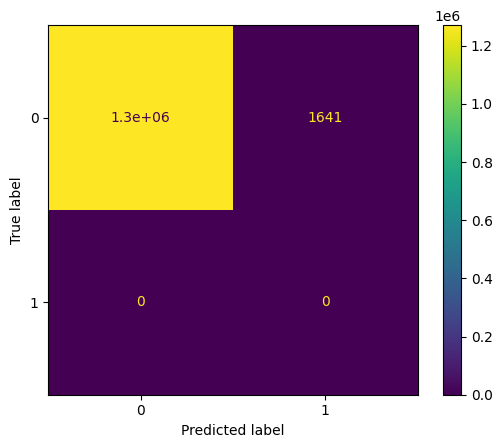

In [ ]:
result = confusion_matrix(y_pred,y_test)
cmd = ConfusionMatrixDisplay(result,display_labels = [0,1])
cmd.plot()

Here we can see that the machine had simply predicted all the output as 1..It never identified any pattern from the algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_pred = DTC.predict(x_test)
accuracy_score(y_pred,y_test)

0.9996000075440621

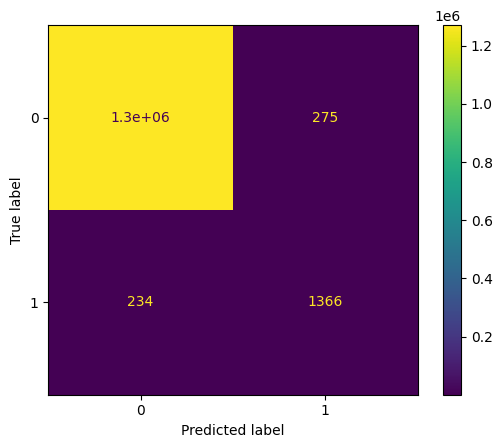

In [ ]:
result = confusion_matrix(y_pred,y_test)
cmd = ConfusionMatrixDisplay(result,display_labels = [0,1])
cmd.plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.85      0.83      0.84      1641

    accuracy                           1.00   1272524
   macro avg       0.93      0.92      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



*Hyper parameter tuning


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier


In [28]:
clf = RandomForestClassifier(n_estimators=50)

In [29]:
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11,2),
              "min_samples_split": sp_randint(2, 11,2),
              "min_samples_leaf": sp_randint(1, 11,2),
              "criterion": ["gini", "entropy"]}

In [30]:
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist,cv=3)

In [ ]:
randomCV.fit(x_train, y_train)
print(randomCV.best_params_)

In [ ]:
print(randomCV.score(x_test,y_test))

**Conclusion**

Every model performs good..Out of it,Random Forest obtains the highest score of all
The best performing model is Random Forest for identifying fraudulent and non-fraudulent payments, as the accuracy  is 0.999, which is close to 1. This means it has a good separability measure, and the model has an 99.9% chance of being able to distinguish between positive and negative classes..